In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/Ch4_HR_HRV_Generation/data-hrv-kaggle'

Mounted at /content/drive


In [ ]:
import pandas as pd

data_train = pd.read_csv(folder_path + '/train.csv')
data_test = pd.read_csv(folder_path + '/test.csv')

In [ ]:
data_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [ ]:
data_test.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Separating the features and the target variable before imputation
X_train = data_train.drop(columns=['condition'])  # Features
y_train = data_train['condition']  # Target

# Imputing missing values in the feature set
imputer = SimpleImputer(strategy="mean")
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train.select_dtypes(include=['float64', 'int64'])),
                         columns=X_train.select_dtypes(include=['float64', 'int64']).columns)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions and Evaluation
X_test = data_test.drop(columns=['condition'])  # Features
y_test = data_test['condition']  # Target

X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test.select_dtypes(include=['float64', 'int64'])),
                         columns=X_test.select_dtypes(include=['float64', 'int64']).columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

y_pred = model.predict(X_test_scaled)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df

,precision,recall,f1-score,support
interruption,1.0,1.0,1.0,11782.0
no stress,1.0,1.0,1.0,22158.0
time pressure,1.0,1.0,1.0,7093.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,41033.0
weighted avg,1.0,1.0,1.0,41033.0


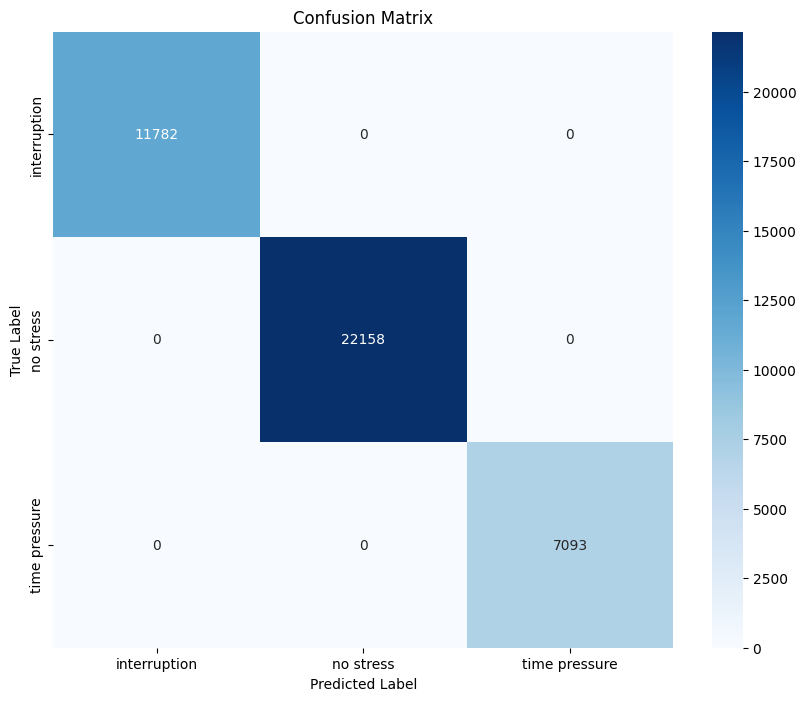

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(n_jobs=-1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
grid_search.best_params_


Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(n_jobs=-1)

# Random search of parameters
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,
                                   n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
random_search.fit(X_train_scaled, y_train)

# Best parameters
random_search.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 